# Data Analysis of the Kaggle Titanic Dataset

Machine Learning Problem: Classification  
Output Variable: Survived

## Import all Libraries

In [1]:
# pandas: handle the datasets in the pandas dataframe for data processing and analysis
import pandas as pd
print("pandas version: {}". format(pd.__version__))

# matplotlib: standard library to create visualizations
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}". format(matplotlib.__version__))

# seaborn: advanced visualization library to create more advanced charts
import seaborn as sns
print("seaborn version: {}". format(sns.__version__))

# turn off warnings for better reading in the Jupyter notebbok
pd.options.mode.chained_assignment = None  # default='warn'

pandas version: 1.4.2
matplotlib version: 3.5.1
seaborn version: 0.11.2


## Load Training and Test Dataset
Load the training and test dataset, that you find on the kaggle website and stored in the 01_RawData folder.

In [3]:
# load training and test dataset
df_train = pd.read_csv('../01_RawData/train.csv')
df_test = pd.read_csv('../01_RawData/test.csv')

## First Look at the Training and Test Dataset
To get a fist look at the training and test datasets, we plot the first few lines and create basic statistical reports.

### Print the first lines of the dataset

In [4]:
# print the first 10 lines of the training data
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# print the first 10 lines of the test data
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### Create a Statistical Report of Numeric and Categorical Features

In [6]:
# create the statistic report of the numeric features of the training dataset
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
# create the statistic report of the numeric features of the test dataset
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


#### Result: statistical resport of numeric features

- The **training dataset contains 891 samples** (number of rows in training dataset) and the **test dataset 418 samples** (number .of rows in test dataset)
- The "PassengerId" is consecutively numbered -> does not add any information if a passenger survived or not but harms the ML algorithm because it adds false added afterwards information
- The feature **"Age" has missing values**. (714 instead of 891 in the training dataset and 332 instead of 418 in the test dataset) -> handle later
- The mean of "Survived" is 0.38, therefore we already know that **38% of all passengers survived**.
- 75% of all passengers are between 38 and 39 years old or younger. There are a few older passengers with the oldest 80 years old.
- More than 75% of all passengers travel without parents or children (75% percentile of Parch == 0)
- The minimum fare is 0 -> check if Children did not have to pay.
- For the test dataset the feature **"Fare" has missing values** (417 instead of 418) -> handle later

In [8]:
# create the statistic report of the categoric features of the training dataset
df_train.describe(include=['O']).transpose()

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [9]:
# create the statistic report of the categoric features of the test dataset
df_test.describe(include=['O']).transpose()

,count,unique,top,freq
Name,418,418,"Kelly, Mr. James",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


#### Results: statistical report of categorical features
- All names in the column "Name" are unique
- There are 843 (577+266) male passengers and (891+418)-843 = 472 female passengers
- 914 (644+270) out of 1.309 passengers embarked in Southampton
- Not all ticket numbers are unique -> maybe children have the ticket number from their parents
- The feature **"Cabin" has missing values** (204 instead of 891 in the training dataset and 91 instead of 418 in the test dataset) -> handle later
- The feature **"Embarked" has missing values** (889 instead of 891 in the training dataset) -> handle later

## Key Questions for the Data Analysis
It is important to get a better understanding of the features, because it might help you to create a better dataset for the machine learning algorithm through feature engineering. Therefore I prepared some key questions.

In [10]:
def pivot_survival_rate(df_train, target_column):
    # create a pivot table with the target_column as index and "Survived" as columns
    # count the number of entries of "PassengerId" for each combination of target_column and "Survived"
    # fill all empty cells with 0
    df_pivot = pd.pivot_table(
        df_train[['PassengerId', target_column, 'Survived']],
        index=[target_column],
        columns=["Survived"],
        aggfunc='count',
        fill_value=0)\
        .reset_index()

    # rename the columns to avoid numbers as column name
    df_pivot.columns = [target_column, 'not_survived', 'survived']

    # create a new column with the total number of survived and not survived passengers
    df_pivot['passengers'] = df_pivot['not_survived']+df_pivot['survived']

    # create a new column with the proportion of survivors to total passengers
    df_pivot['survival_rate'] = df_pivot['survived']/df_pivot['passengers']*100

    print(df_pivot.to_markdown())

### Had Older Passengers and Children a Higher Chance of Survival?
Create a basic univariate distribution plot of "Age" in the training data to find the threshold values when the survival rate is changing. Based on this thresholds, we create a new feature that categorizes the age feature (children, adult, senior). Based on the number of survived passengers, we can then calculate the survival rate for each age category.

#### Univariate Dirstribution Plot: "Age"

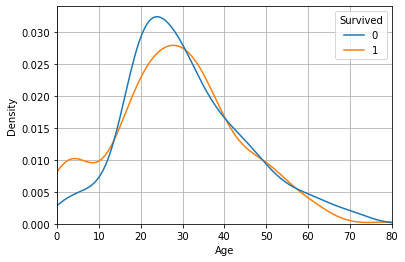

In [11]:
# create univariate dirstribution plot for "Age" seperated by "Survived"
# common_norm=False: distribution for survived and not survived passengers sum up individually to 1
sns.kdeplot(data=df_train, x="Age", hue="Survived", common_norm=False)
#sns.kdeplot(data=df_train, x="Age", hue="Survived")

# limit the x-axes to the max age
plt.xlim(0, df_train['Age'].max())

plt.grid()
plt.show()

From the distribution plot we can get the following information, by comparing the difference between the line of survived (orange) and not survived (blue):

- Below 12 years, the chances of survival are higher than not to survive, especially for children around 5 years (peak in the survived curve).
- If a passenger is older than the 60 years, the chance to survive reduces very fast.

#### Create Age Category and Calculate Survival Rate of each Category

In [12]:
def age_category(row):
    """
    Function to transform the actual age in to an age category
    Thresholds are deduced from the distribution plot of age
    """
    if row < 12:
        return 'children'
    if (row >= 12) & (row < 60):
        return 'adult'
    if row >= 60:
        return 'senior'
    else:
        return 'no age'

# apply the function age_category to each row of the dataset
df_train['Age_category'] = df_train['Age'].apply(lambda row: age_category(row))
df_test['Age_category'] = df_test['Age'].apply(lambda row: age_category(row))

In [13]:
# show the survival table with the previously created function
pivot_survival_rate(df_train, "Age_category")

|    | Age_category   |   not_survived |   survived |   passengers |   survival_rate |
|---:|:---------------|---------------:|-----------:|-------------:|----------------:|
|  0 | adult          |            376 |        244 |          620 |         39.3548 |
|  1 | children       |             29 |         39 |           68 |         57.3529 |
|  2 | no age         |            125 |         52 |          177 |         29.3785 |
|  3 | senior         |             19 |          7 |           26 |         26.9231 |


#### Results
- Children under 12 years have a higher survival rate (57%).
- Passangers older 60 years have a lower survival rate (27%).

### Had Passengers of a Higher Pclass also a Higher Change of Survival?
First we compute the countplot with the seaborn library and use the "Survived" feature as category to see the absolute amount of passengers that survived and died in the three different passenger classes. Then we group the dataset by the passenger class and calculate the relative survival rate for each passenger class.

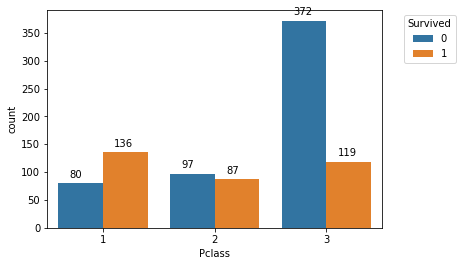

In [14]:
# create a count plot that counts the survived and not survived passengers for each passenger class
ax=sns.countplot(data=df_train, x='Pclass', hue='Survived')

# show numbers above the bars
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

# show the ledgend outside of the plot
ax.legend(title='Survived', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

From the bar chart we can see that most passengers that survived are from the 1st class, but to get the exact numbers, we use the pivot_survival_rate function.

In [15]:
pivot_survival_rate(df_train, "Pclass")

|    |   Pclass |   not_survived |   survived |   passengers |   survival_rate |
|---:|---------:|---------------:|-----------:|-------------:|----------------:|
|  0 |        1 |             80 |        136 |          216 |         62.963  |
|  1 |        2 |             97 |         87 |          184 |         47.2826 |
|  2 |        3 |            372 |        119 |          491 |         24.2363 |


#### Results
- The higher the passenger class, the higher was the survival rate.
- **The highest survival rate had passengers in the first class (63%) compared to the survival rate of the lowest class (24%).**

### Did Passengers that Paid a Higher Fare also had a Higher Survival Rate?
To see if the fare influences the survival rate, we create a basic univariate distribution plot of "Fare" for the training data because we need the information if the passengers survived not or. For the distribution plot we use the kdeplot function of the seaborn library and separate the distribution by "Survived".

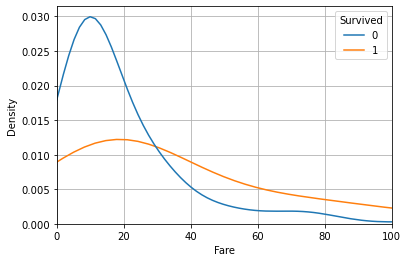

In [16]:
# create univariate dirstribution plot for "Fare" seperated by "Survived"
# common_norm=False: distribution for survived and not survived passengers sum up individually to 1
sns.kdeplot(data=df_train, x="Fare", hue="Survived", common_norm=False)
plt.grid()
plt.xlim(0, 100)
plt.show()

#### Results
- Under a fare of 30 the survival rate is very low with the top at around a fare of 10. 
- If a passengers paid a fare higher then 30, the chance to survive was higher than to not survive the Titanic.

### Did women have a Higher Chance of Survival?
To find out if the sex of a passenger had an influence on the survival rate, we pivot the training data with "Sex" as index and "Survived" as columns. 

In [17]:
pivot_survival_rate(df_train, "Sex")

|    | Sex    |   not_survived |   survived |   passengers |   survival_rate |
|---:|:-------|---------------:|-----------:|-------------:|----------------:|
|  0 | female |             81 |        233 |          314 |         74.2038 |
|  1 | male   |            468 |        109 |          577 |         18.8908 |


#### Result
- **The survival rate of female passengers is much higher with 74% compared to the survival rate of male passengers with 19%.**

### Did the Port of Embarkation influence the Survival Rate?
To find out if the port of embarkation influenced the survival rate, we pivot the training data with "Embarked" as index and "Survived" as columns. 

In [18]:
pivot_survival_rate(df_train, "Embarked")

|    | Embarked   |   not_survived |   survived |   passengers |   survival_rate |
|---:|:-----------|---------------:|-----------:|-------------:|----------------:|
|  0 | C          |             75 |         93 |          168 |         55.3571 |
|  1 | Q          |             47 |         30 |           77 |         38.961  |
|  2 | S          |            427 |        217 |          644 |         33.6957 |


#### Results
- There is a difference in the survival rate between the three different ports.
- The lowest survival rate had passengers that embarked in Southampton (S) with 34%.
- The highest survival rate had passengers that embarked in Cherbourg (C) with 55%.

## Try to separate Survived and not Survived Passengers
In addition to the key questions, we create different visualizations to see if one or a combination of features are able to separate the survived and not survived passengers. This task gives an indication which features could be important for the machine learning algorithm.

### Survival Rate for Sex and Pclass
During the data analysis process we saw that the Sex as well as the Pclass had a significant influence on the survival rate. Therefore we would like to see the combined influence of Sex and Pclass on the survival rate.

- Use catplot for categorical and numerical features
- Use bar_label (matplotlib >= v3.4.2) to show the numbers for each bar

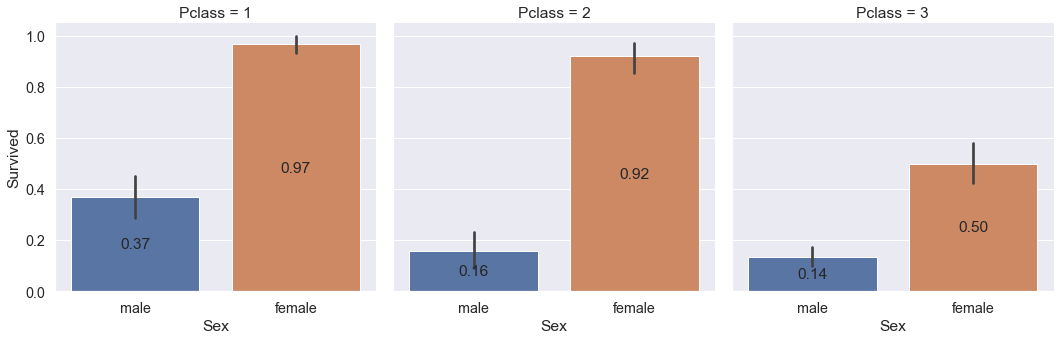

In [19]:
sns.set(font_scale=1.3)
g = sns.catplot(x="Sex", y="Survived", col="Pclass", data=df_train, kind="bar")

# loop over the three different axes crated by the col feature
for i in range(3):
    # extract the matplotlib axes_subplot objects from the FacetGrid
    ax = g.facet_axis(0, i)

    # iterate through the axes containers
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')

plt.show()

#### Results Catplot of Survival Rate for Sex and Pclass
- Almost all female passengers of the first class (97%) as well as the second class (92%) survived.
- Female passengers of the 3rd class had a higher chance of survival than male passengers of the first class **-> the feature Sex has a higher influence of the survival rate than the Pclass.**
- Male passengers from the first class had more than twice as high a change in survival as male from the second and third class.
- The survival rate of male passengers between the second and third class differs not much.

### Survival Rate for Age and Pclass
- Almost all young passengers from the first and second passenger class survived, but there are a lot of young passengers from the third class that died.
- The second observation from the swarmplot is that older passengers have a higher survival change if they are in a higher passenger class (imagine a horizontal line, starting around the age of 50).

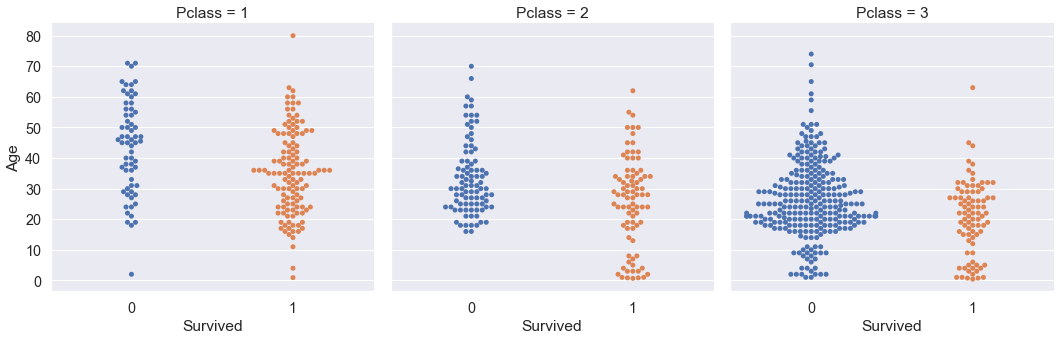

In [20]:
g = sns.catplot(x="Survived", y="Age", col="Pclass", data=df_train, kind="swarm")
plt.show()

### Survival Rate for selected Categorical and Numerical Features
- Use
    - catplot for categorical and
    - kdeplot for numerical features
- Use bar_label (matplotlib >= v3.4.2) to show the numbers for each bar

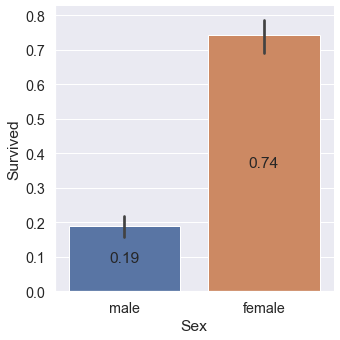

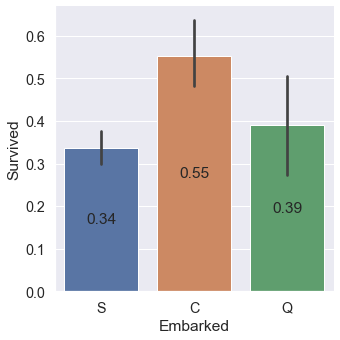

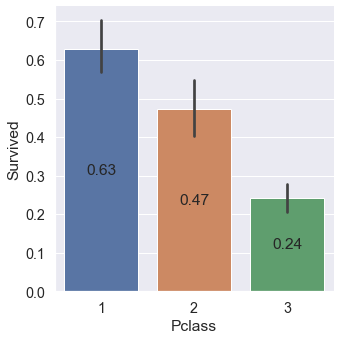

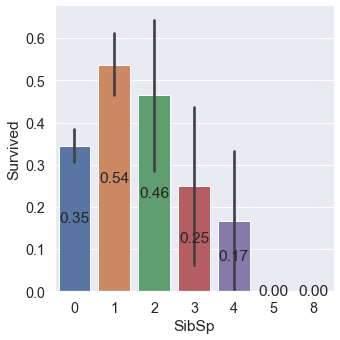

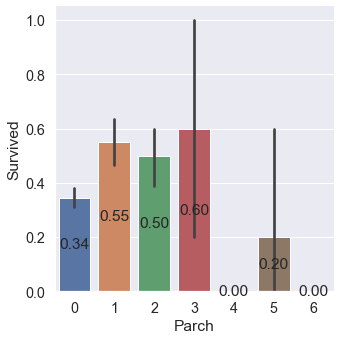

In [21]:
for feature in ["Sex", "Embarked", "Pclass", "SibSp", "Parch"]:
    g = sns.catplot(x=feature, y="Survived", data=df_train, kind="bar")
    
    # extract the matplotlib axes_subplot objects from the FacetGrid
    ax = g.facet_axis(0, -1)

    # iterate through the axes containers
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')
    
    plt.show()

#### Results Catplot of selected Categorical Features
- **Sex:** The survival rate of female passengers is much higher with 74% compared to the survival rate of male passengers with 19%.
- **Embarked:** There is a difference in the survival rate between the three different ports. The lowest survival rate had passengers that embarked in Southampton (S) with 34%. The highest survival rate had passengers that embarked in Cherbourg (C) with 55%.
- **Pclass:** The higher the passenger class, the higher was the survival rate. The highest survival rate had passengers in the first class (63%) compared to the survival rate of the lowest class (24%).
- **SibSp:** The highest survival rate had passengers with 1 sibling or spouse (54%). The second highest survival rate had passengers with 2 siblings or spouses (45%) but the confidence interval gets very wide. Therefore the reliability of the results gets weaker.
- **Parch:** Passengers with 3 parents or children had the highest survival rate (60%) but with a wide confidence interval. Therefore passengers with 1 parch had a slightly lower mean survival rate (55%) but is it a more confidence result.

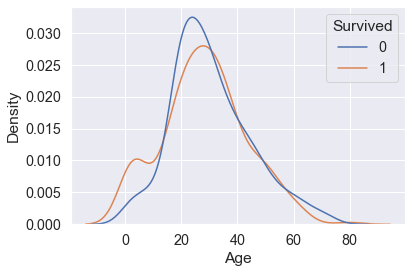

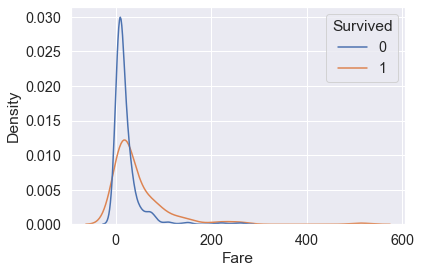

In [22]:
for feature in ["Age", "Fare"]:
    g = sns.kdeplot(data=df_train, x=feature, hue="Survived", common_norm=False)
    plt.show()

#### Results Catplot of selected Numerical Features
- **Age:** Below 12 years, the chances of survival are higher than not to survive, especially for children around 5 years. If a passenger is older than the 60 years, the change to survive reduces very fast.
- **Fare:** The kernel density estimate (KDE) plot shows values that does not exists in the dataset, like a negative "Fare". Under a fare of 30 the survival rate is very low with the top at around a fare of 10. If a passengers paid a fare higher then 30, the chance to survive was higher than to not survive the Titanic. **-> see the the kdeplot with the limited x-axis in the key question section.**

## Save the Analyzed Dataset

In [23]:
df_train.to_pickle('df_train.pkl')
df_test.to_pickle('df_test.pkl')